**How to Check if Time Series Data is Stationary with Python**
---

Time series is different from more traditional classification and regression predictive modeling problems.

The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

### Stationary Time Series

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

In [2]:
import pandas as pd

In [3]:
series = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
series = pd.read_csv(series, index_col=0, header=0)

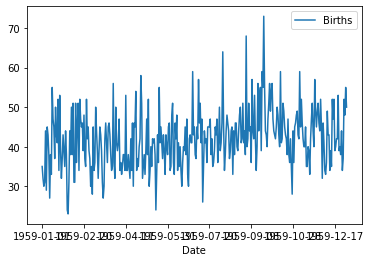

In [4]:
from matplotlib import pyplot
series.plot()
pyplot.show()


### Non-Stationary Time Series

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

In [6]:
series = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
series = pd.read_csv(series, header=0, index_col=0)

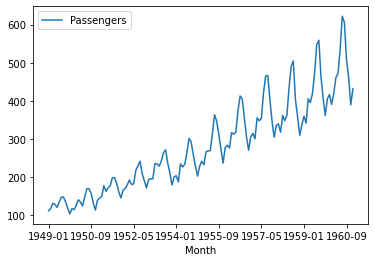

In [7]:
series.plot()
pyplot.show()

### Stationary Time Series and Forecasting

Should you make your time series stationary?

Generally, yes.

If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.



### Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

`Look at Plots:` You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
`Summary Statistics:` You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
`Statistical Tests:` You can use statistical tests to check if the expectations of stationarity are met or have been violated.

`Summary Statistics`

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [13]:
import pandas as pd
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
X = series.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))



mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


Running the example, we can see the mean and variance look very different.

We have a non-stationary time series.

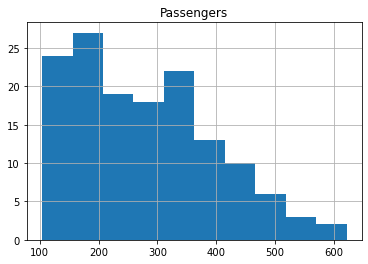

In [14]:
series.hist()
pyplot.show()

Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

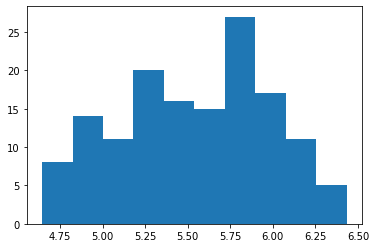

In [16]:
# if we do a log transform, we can get the distribution to be normal
import numpy as np
X = series.values
X = np.log(X)
# we can plot the histogram and KDE to see the distribution
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()

In [17]:
# we can also check the mean and standard deviation and variances of the data
split = len(X) // 2
X1, X2 = X[:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
std1, std2 = X1.std(), X2.std()
var1, var2 = X1.var(), X2.var()

print(f'Mean of X1: {mean1}')
print(f'Mean of X2: {mean2}')
print(f'Standard deviation of X1: {std1}')
print(f'Standard deviation of X2: {std2}')
print(f'Variance of X1: {var1}')
print(f'Variance of X2: {var2}')


Mean of X1: 5.17514614000377
Mean of X2: 5.909205777059973
Standard deviation of X1: 0.2614858710244744
Standard deviation of X2: 0.2219553868604685
Variance of X1: 0.06837486074542806
Variance of X2: 0.04926419375638024


This is a quick and dirty method that may be easily fooled.

We can use a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student t-test, but things get tricky because of the serial correlation between values.

### Statistical Tests
`Augmented Dickey-Fuller test`

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

`The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.`

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

`Null Hypothesis (H0):` If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.\
`Alternate Hypothesis (H1):` The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

`p-value > 0.05:` Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.\
`p-value <= 0.05:` Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [19]:
series = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
series = pd.read_csv(series, index_col=0, header=0)
X = series.values

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.